# Завдання 1
Використовуючи датасет з оглядами книжок з попередньої роботи, натренуйте word2vec модель з нуля, потім використайте вже натерновані моделі такі як word2vec, fasttext, doc2vec і порівняйте результати з натренованою власною моделлю.

Візуалізуйте ембедінги і порівняйте близькість слів.
### Word2Vec:
- Розгляньте дві архітектури Word2Vec: Continuous Bag of Words (CBOW) та Skip-gram, висвітлюючи їхні відмінності та випадки використання.

### Математичні основи:
- Поясніть концепцію векторів слів та як Word2Vec використовує нейронну мережу для вивчення цих векторів.
- Запровадьте цільові функції для CBOW та Skip-gram та концепцію негативного семплінгу або ієрархічного softmax.

### Попередня обробка даних:
- Токенізація: розбиття тексту на слова.
- Побудова словника: ідентифікація унікальних слів.
- Створення пар контексту: генерація пар вхід-ціль згідно обраної архітектури (CBOW або Skip-gram).
- інші методи.

### Реалізація моделі Word2Vec:
- Поясніть архітектуру нейронної мережі, яка використовується в Word2Vec, зосереджуючись на вхідному шарі, прихованому шарі та вихідному шарі.
- Обговоріть процес ініціалізації матриць ваг і роль softmax на вихідному шарі для прогнозування слів.

### Тренування моделі:
- Опишіть процес тренування, включаючи пряме поширення для обчислення прогнозів, loss функцію та бекпропагацію.
- Поясніть важливість вибору відповідних гіперпараметрів, як-от швидкість навчання, розмір вікна, розмір вбудування тощо.

### Вилучення векторів слів:
- Після тренування моделі поясніть, як витягнути вектори слів з матриці ваг.
- Обговоріть, як ці вектори можна використовувати для пошуку схожості слів, аналогій тощо.

Приклад тренування моделі word2vec:

In [ ]:
import numpy as np
import collections
import random

# Sample corpus
corpus = "The quick brown fox jumps over the lazy dog"

def preprocess_corpus(corpus):
    # Convert the corpus to lowercase and split into words
    words = corpus.lower().split()
    # Count the frequency of each word in the corpus
    word_count = collections.Counter(words)
    return words, word_count

def create_pairs(words, context_window):
    # Create word pairs based on the context window
    pairs = []
    for i, word in enumerate(words):
        # Iterate through the context window around the target word
        for j in range(max(i - context_window, 0), min(i + context_window + 1, len(words))):
            if i != j:
                pairs.append((word, words[j]))  # Add the (target, context) pair
    return pairs

def get_word_index(word_count):
    # Assign an index to each unique word
    word_index = {}
    for i, word in enumerate(word_count.keys()):
        word_index[word] = i
    return word_index

def train_word2vec(pairs, word_count, dim, epochs, learning_rate):
    # Initialize the weight matrices for the neural network
    V = len(word_count)  # Vocabulary size
    W = np.random.rand(V, dim)  # Input to hidden layer weights
    W_prime = np.random.rand(dim, V)  # Hidden to output layer weights

    for epoch in range(epochs):
        loss = 0
        for pair in pairs:
            center_word, context_word = pair
            center_index = word_index[center_word]  # Index of the center word
            context_index = word_index[context_word]  # Index of the context word

            # Forward pass: compute the hidden layer and output layer predictions
            hidden_layer = W[center_index]
            predicted = softmax(np.dot(hidden_layer, W_prime))

            # Compute the loss: negative log likelihood
            loss -= np.log(predicted[context_index])

            # Backpropagation: compute gradients and update weights
            dl_dy = predicted
            dl_dy[context_index] -= 1  # Derivative of loss w.r.t. softmax output

            dl_dw_prime = np.outer(hidden_layer, dl_dy)  # Gradient w.r.t. W_prime
            dl_dhidden = np.dot(W_prime, dl_dy)  # Gradient w.r.t. hidden layer

            W_prime -= learning_rate * dl_dw_prime  # Update W_prime
            W[center_index] -= learning_rate * dl_dhidden  # Update W

        print(f"Epoch: {epoch}, Loss: {loss}")

    return W  # Return the input-to-hidden layer weights, which are the word embeddings

def softmax(x):
    # Compute softmax values for each set of scores in x
    e_x = np.exp(x - np.max(x))  # Subtract max for numerical stability
    return e_x / e_x.sum(axis=0)  # Divide by the sum to get probabilities

# Preprocess corpus and create training pairs
words, word_count = preprocess_corpus(corpus)
pairs = create_pairs(words, 3)  # Create word pairs with a context window of size 3

# Map words to indices
word_index = get_word_index(word_count)

# Train the model
word_vectors = train_word2vec(pairs, word_count, dim=50, epochs=100, learning_rate=0.01)

# After training, word_vectors can be used to look up embeddings

In [2]:
word_vectors[0]

array([ 0.73312377, -0.2243597 ,  0.763462  ,  0.72711357,  0.07438551,
        0.17363124,  0.28799628,  0.668847  ,  0.28413874,  0.51918509,
        0.3700634 ,  0.37579389,  0.23729036,  0.36275052,  0.81962296,
        0.51279331,  0.17977212,  0.45761423,  0.89762095,  0.4826054 ,
        0.25128048,  0.81143442,  0.19944879,  0.98341214,  0.20729798,
        0.30121501,  0.62613067,  0.48557193,  0.55219873,  0.41594794,
        0.87899377,  0.25090532,  0.074254  ,  0.40836686,  0.54932731,
        0.01761935,  0.29535115,  0.20458697,  0.39046555,  0.89441631,
        0.77064025,  1.02589797, -0.03780116,  0.3492056 ,  0.86108796,
        0.1766345 ,  0.95802129,  0.01195978,  0.55145408, -0.14019507])

In [4]:
from sklearn.metrics.pairwise import cosine_similarity

# Assume word_vectors is the trained word embeddings matrix from the Word2Vec model
# word_index is a dictionary mapping words to their index in the word_vectors matrix

# Function to get the vector for a specific word
def get_word_vector(word, word_index, word_vectors):
    index = word_index.get(word, None)
    if index is not None:
        return word_vectors[index]
    else:
        return None

# Function to find the closest words to a given word
def closest_words(word, word_index, word_vectors, n=5):
    index = word_index.get(word, None)
    if index is None:
        return None
    
    # Compute cosine similarity between the word and all other words
    similarities = cosine_similarity(word_vectors[index].reshape(1, -1), word_vectors).flatten()
    
    # Get the indices of the top n similar words
    closest_indices = similarities.argsort()[-n-1:-1][::-1]  # Exclude the word itself
    
    # Map indices back to words
    closest_words = [list(word_index.keys())[list(word_index.values()).index(i)] for i in closest_indices]
    
    return closest_words

# Example usage:
word = "quick"
word_vector = get_word_vector(word, word_index, word_vectors)
print(f"Vector for '{word}':\n{word_vector}")

# Find words closest to 'quick'
closest = closest_words('quick', word_index, word_vectors, n=3)
print(f"Words closest to 'quick': {closest}")

Vector for 'quick':
[ 0.55722498  0.69708446  0.36800627  0.84113167  0.92231125  0.44551605
  0.35181475  0.14035737  0.82378431  0.96017812  0.53859522  0.71395414
  0.35054537  1.01752151  0.04704904  0.99172569  0.75298303  0.66391169
  0.85405183  0.12345592  0.3061029   0.330706    0.97442096  0.02329407
  0.74522549  0.64826541  0.89582091 -0.13886917  0.75648919  0.77630262
  0.09049278 -0.05852113  0.65630137  0.38190596  0.78689558 -0.05521722
 -0.02118902  0.52046586  0.80612118  0.30981224  0.93959901  0.21012012
  0.29884303  0.79334215  0.1667451   0.58759007  0.73810778  0.10465658
  0.44081445  0.72099184]
Words closest to 'quick': ['fox', 'brown', 'lazy']


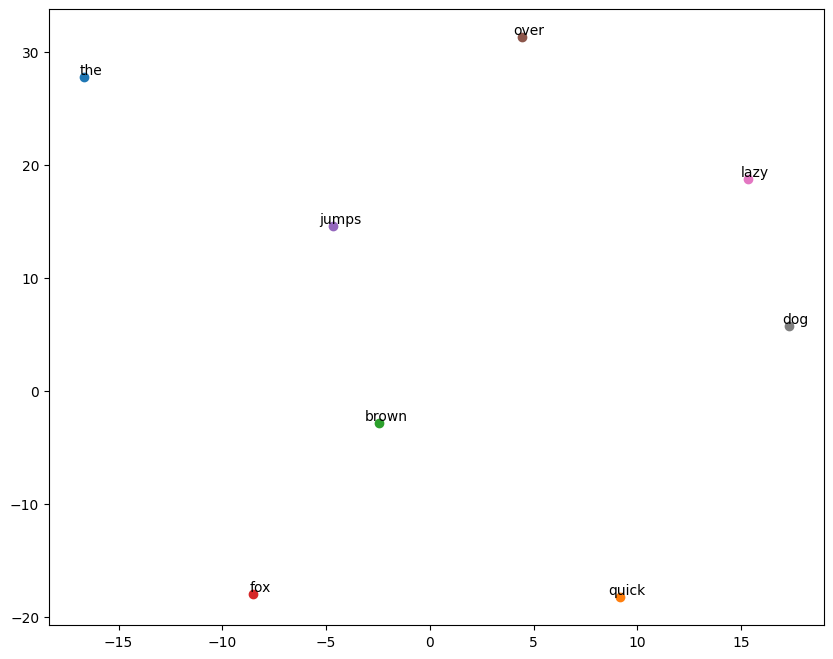

In [6]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def visualize_embeddings(word_vectors, word_index):
    # Since we have a very small number of samples, we set perplexity to a low value
    # Perplexity should be less than the number of samples
    tsne = TSNE(n_components=2, random_state=0, perplexity=5)  # Adjust perplexity here
    vectors_2d = tsne.fit_transform(word_vectors)
    
    # Plotting the results
    plt.figure(figsize=(10, 8))
    for word, index in word_index.items():
        x, y = vectors_2d[index]
        plt.scatter(x, y)
        plt.annotate(word, (x, y), textcoords="offset points", xytext=(5, 2), ha='center')
    
    plt.show()

visualize_embeddings(word_vectors, word_index)

# Завдання 2
Зробіть Fully Connected NN для передбачення рейтингу книжки. Використайте свою word2vec модель та порівняйте з використанням інших векторів (для порівняння використовуйте F1 метрику)

- Поясніть структуру FFNN, яка складається з вхідного шару, одного або декількох прихованих шарів та вихідного шару.
- Обговоріть функції активації, такі як ReLU для прихованих шарів та лінійну функцію активації для вихідного шару у випадку регресії.
- Визначте кількість шарів та кількість нейронів у кожному шарі.
- Для побудови мережі використовуйте numpy а потім pytorch. Порі
- Після навчання оцініть продуктивність FFNN на валідаційному або тестовому наборі.
- Використовуйте відповідні метрики, такі як MSE або середня абсолютна помилка (MAE).

In [11]:
import numpy as np

# Assuming we have 100 books
num_books = 100
vector_dim = 50  # Dimensionality of the Word2Vec embeddings

# Simulating averaged word vectors for book descriptions (dummy data)
book_vectors = np.random.rand(num_books, vector_dim)

# Simulating book ratings (targets) on a scale of 1 to 5
book_ratings = np.random.randint(1, 6, size=(num_books, 1))

# Splitting the dataset into training and testing sets
train_size = int(num_books * 0.8)
X_train, X_test = book_vectors[:train_size], book_vectors[train_size:]
y_train, y_test = book_ratings[:train_size], book_ratings[train_size:]

# FFNN architecture from the previous example
input_size = vector_dim
hidden_size = 10
output_size = 1

# Initialize weights and biases
np.random.seed(0)  # For reproducibility
W1 = np.random.rand(input_size, hidden_size)
b1 = np.random.rand(hidden_size)
W2 = np.random.rand(hidden_size, output_size)
b2 = np.random.rand(output_size)

# Activation and loss functions
def relu(x):
    return np.maximum(0, x)

def mse_loss(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

# Forward pass function
def forward_pass(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    return Z2

# Training the FFNN
epochs = 100
learning_rate = 0.01

for epoch in range(epochs):
    # Forward pass
    predictions = forward_pass(X_train, W1, b1, W2, b2)
    
    # Compute loss
    loss = mse_loss(y_train, predictions)
    
    # Backpropagation (simplified)
    error = predictions - y_train
    dW2 = np.dot(error.T, relu(np.dot(X_train, W1) + b1)).T
    db2 = np.sum(error, axis=0)
    dW1 = np.dot(X_train.T, np.dot(error, W2.T) * (relu(np.dot(X_train, W1) + b1) > 0))
    db1 = np.sum(np.dot(error, W2.T) * (relu(np.dot(X_train, W1) + b1) > 0), axis=0)
    
    # Update weights and biases
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    if epoch % 10 == 0:
        print(f"Epoch: {epoch}, Loss: {loss}")

# Predicting ratings for the test set
test_predictions = forward_pass(X_test, W1, b1, W2, b2).flatten()
test_predictions = np.round(test_predictions)  # Rounding predictions to get integer ratings

# Comparing actual and predicted ratings for the test set
for i in range(len(test_predictions)):
    print(f"Book {i+1}: Actual Rating = {y_test[i][0]}, Predicted Rating = {int(test_predictions[i])}")


Epoch: 0, Loss: 4286.654652517146
Epoch: 10, Loss: 2.00000000078163
Epoch: 20, Loss: 2.0
Epoch: 30, Loss: 2.0
Epoch: 40, Loss: 2.0
Epoch: 50, Loss: 2.0
Epoch: 60, Loss: 2.0
Epoch: 70, Loss: 2.0
Epoch: 80, Loss: 2.0
Epoch: 90, Loss: 2.0
Book 1: Actual Rating = 2, Predicted Rating = 3
Book 2: Actual Rating = 1, Predicted Rating = 3
Book 3: Actual Rating = 5, Predicted Rating = 3
Book 4: Actual Rating = 5, Predicted Rating = 3
Book 5: Actual Rating = 5, Predicted Rating = 3
Book 6: Actual Rating = 3, Predicted Rating = 3
Book 7: Actual Rating = 5, Predicted Rating = 3
Book 8: Actual Rating = 2, Predicted Rating = 3
Book 9: Actual Rating = 4, Predicted Rating = 3
Book 10: Actual Rating = 4, Predicted Rating = 3
Book 11: Actual Rating = 5, Predicted Rating = 3
Book 12: Actual Rating = 4, Predicted Rating = 3
Book 13: Actual Rating = 3, Predicted Rating = 3
Book 14: Actual Rating = 4, Predicted Rating = 3
Book 15: Actual Rating = 5, Predicted Rating = 3
Book 16: Actual Rating = 1, Predicted 

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim

# Assuming we have 100 books and each book is represented by a 50-dimensional averaged word vector
num_books = 100
vector_dim = 50

# Creating dummy data: 100 book vectors and random ratings between 1 and 5
book_vectors = torch.rand(num_books, vector_dim)
book_ratings = torch.randint(1, 6, (num_books, 1), dtype=torch.float)

# Split the data into training and testing sets
train_size = int(num_books * 0.8)
X_train, X_test = book_vectors[:train_size], book_vectors[train_size:]
y_train, y_test = book_ratings[:train_size], book_ratings[train_size:]

# Defining the FFNN using PyTorch
class BookRatingPredictor(nn.Module):
    def __init__(self):
        super(BookRatingPredictor, self).__init__()
        self.fc1 = nn.Linear(vector_dim, 10)  # Input layer to hidden layer
        self.relu = nn.ReLU()                 # Activation function
        self.fc2 = nn.Linear(10, 1)           # Hidden layer to output layer
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Instantiate the model, define the loss function and the optimizer
model = BookRatingPredictor()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training the model
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()   # Clearing the gradients
    outputs = model(X_train)  # Forward pass
    loss = criterion(outputs, y_train)  # Calculate the loss
    loss.backward()  # Backpropagation
    optimizer.step()  # Update the weights

    if epoch % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item()}')

# Testing the model
model.eval()  # Evaluation mode
with torch.no_grad():  # No need to track the gradients
    predictions = model(X_test)
    predictions = torch.round(predictions)  # Round predictions to get integer ratings

# Compare actual and predicted ratings
for i in range(len(predictions)):
    print(f"Book {i+1}: Actual Rating = {y_test[i].item()}, Predicted Rating = {predictions[i].item()}")


/Users/romankyslyi/opt/anaconda3/envs/transformers/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Epoch [1/100], Loss: 10.309393882751465
Epoch [11/100], Loss: 2.4357497692108154
Epoch [21/100], Loss: 2.5755295753479004
Epoch [31/100], Loss: 1.9827114343643188
Epoch [41/100], Loss: 1.8942105770111084
Epoch [51/100], Loss: 1.8655608892440796
Epoch [61/100], Loss: 1.801476240158081
Epoch [71/100], Loss: 1.755178451538086
Epoch [81/100], Loss: 1.7109978199005127
Epoch [91/100], Loss: 1.6619575023651123
Book 1: Actual Rating = 2.0, Predicted Rating = 3.0
Book 2: Actual Rating = 4.0, Predicted Rating = 3.0
Book 3: Actual Rating = 3.0, Predicted Rating = 3.0
Book 4: Actual Rating = 1.0, Predicted Rating = 3.0
Book 5: Actual Rating = 3.0, Predicted Rating = 3.0
Book 6: Actual Rating = 4.0, Predicted Rating = 3.0
Book 7: Actual Rating = 3.0, Predicted Rating = 3.0
Book 8: Actual Rating = 2.0, Predicted Rating = 3.0
Book 9: Actual Rating = 5.0, Predicted Rating = 4.0
Book 10: Actual Rating = 4.0, Predicted Rating = 3.0
Book 11: Actual Rating = 5.0, Predicted Rating = 3.0
Book 12: Actual Rat